## 2. Classification by a neural network using Keras
- "What is a neural network?"
- "How do I compose a Neural Network using Keras?"
- "How do I train this network on a dataset?"
- "How do I get insight into learning process?"
- "How do I measure the performance of the network?"

## Deep learning Workflow:
1. Formulate / Outline the problem
2. Identify inputs and outputs
3. Prepare data
4. Choose a pretrained model or start building or start building architecture from scratch
5.  Choose a loss function and optimizer
6.  Train the model
7.  Perform a Prediction/Classification
8.  Measure performance
9.  Refine the model
10.  Save model

### Deep learning cycle
1. Quickly setup a working pipeline

2. -> adapt -> test -> adapt -> test -> repeat until you're happy

## 1. Formulate/outline the problem: penguin classification

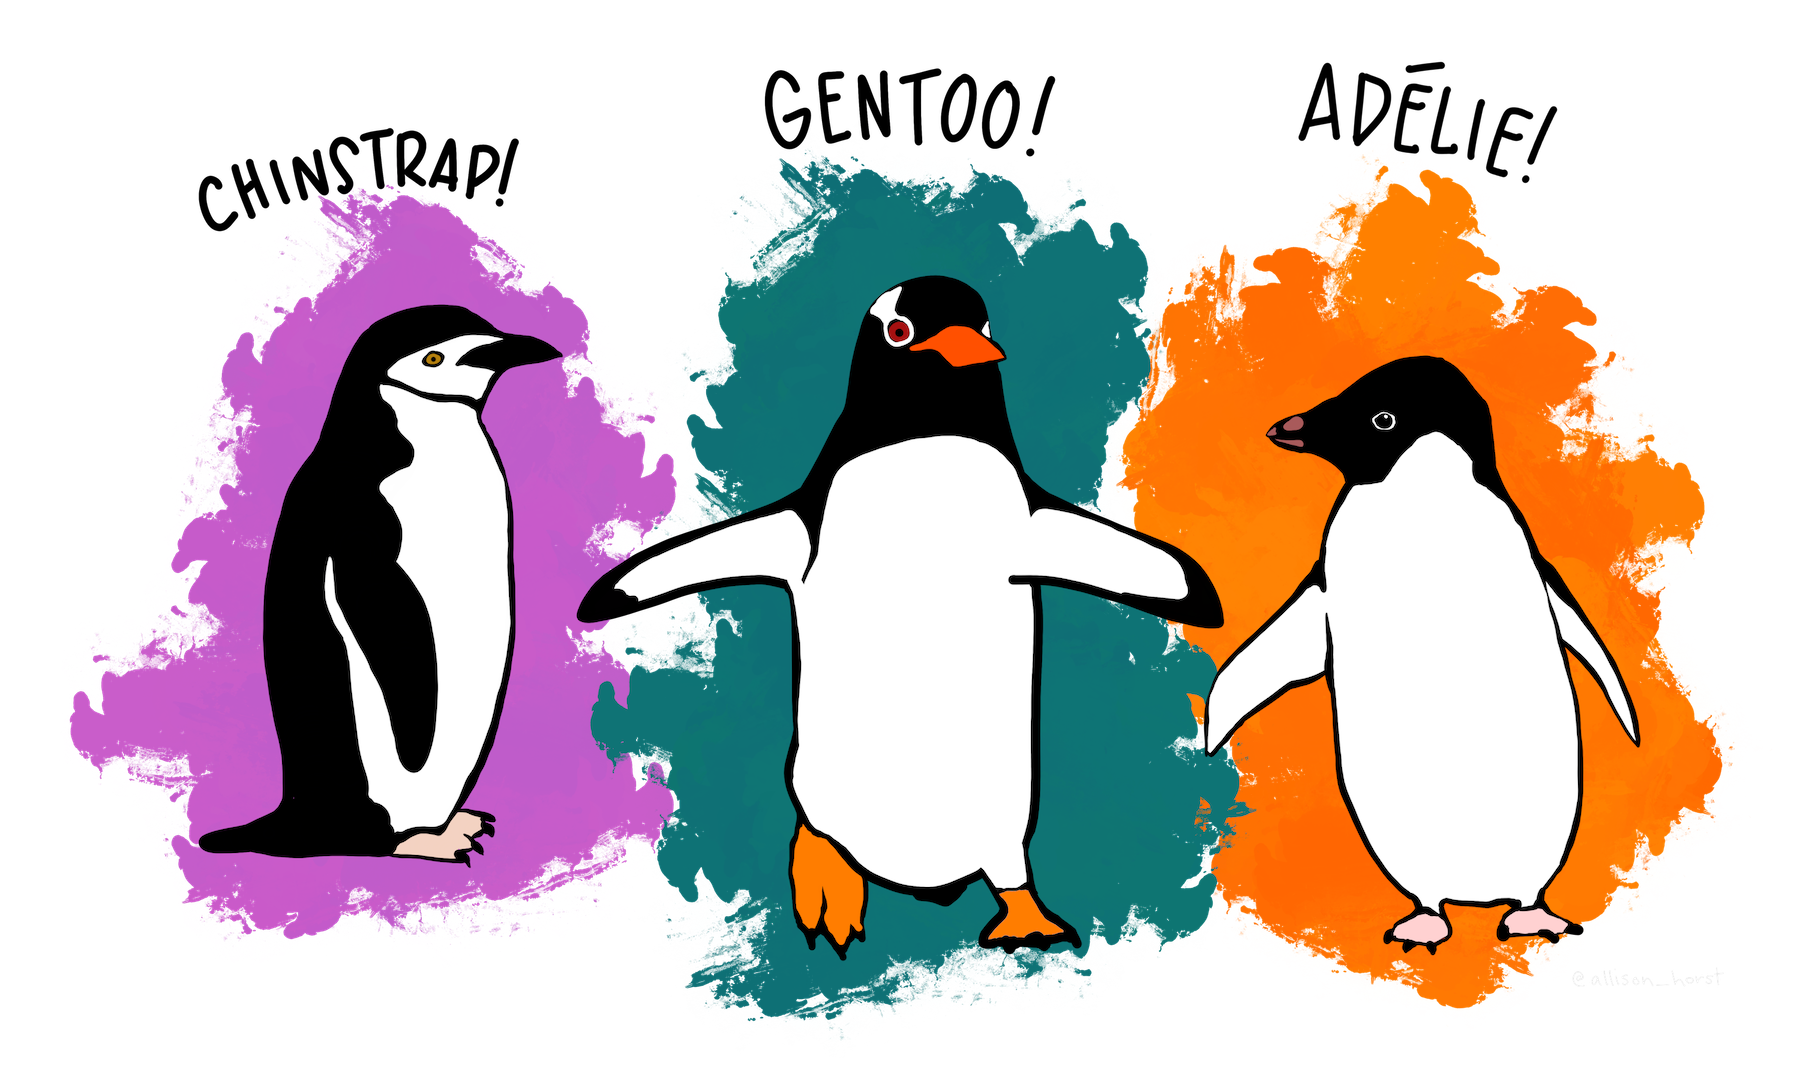

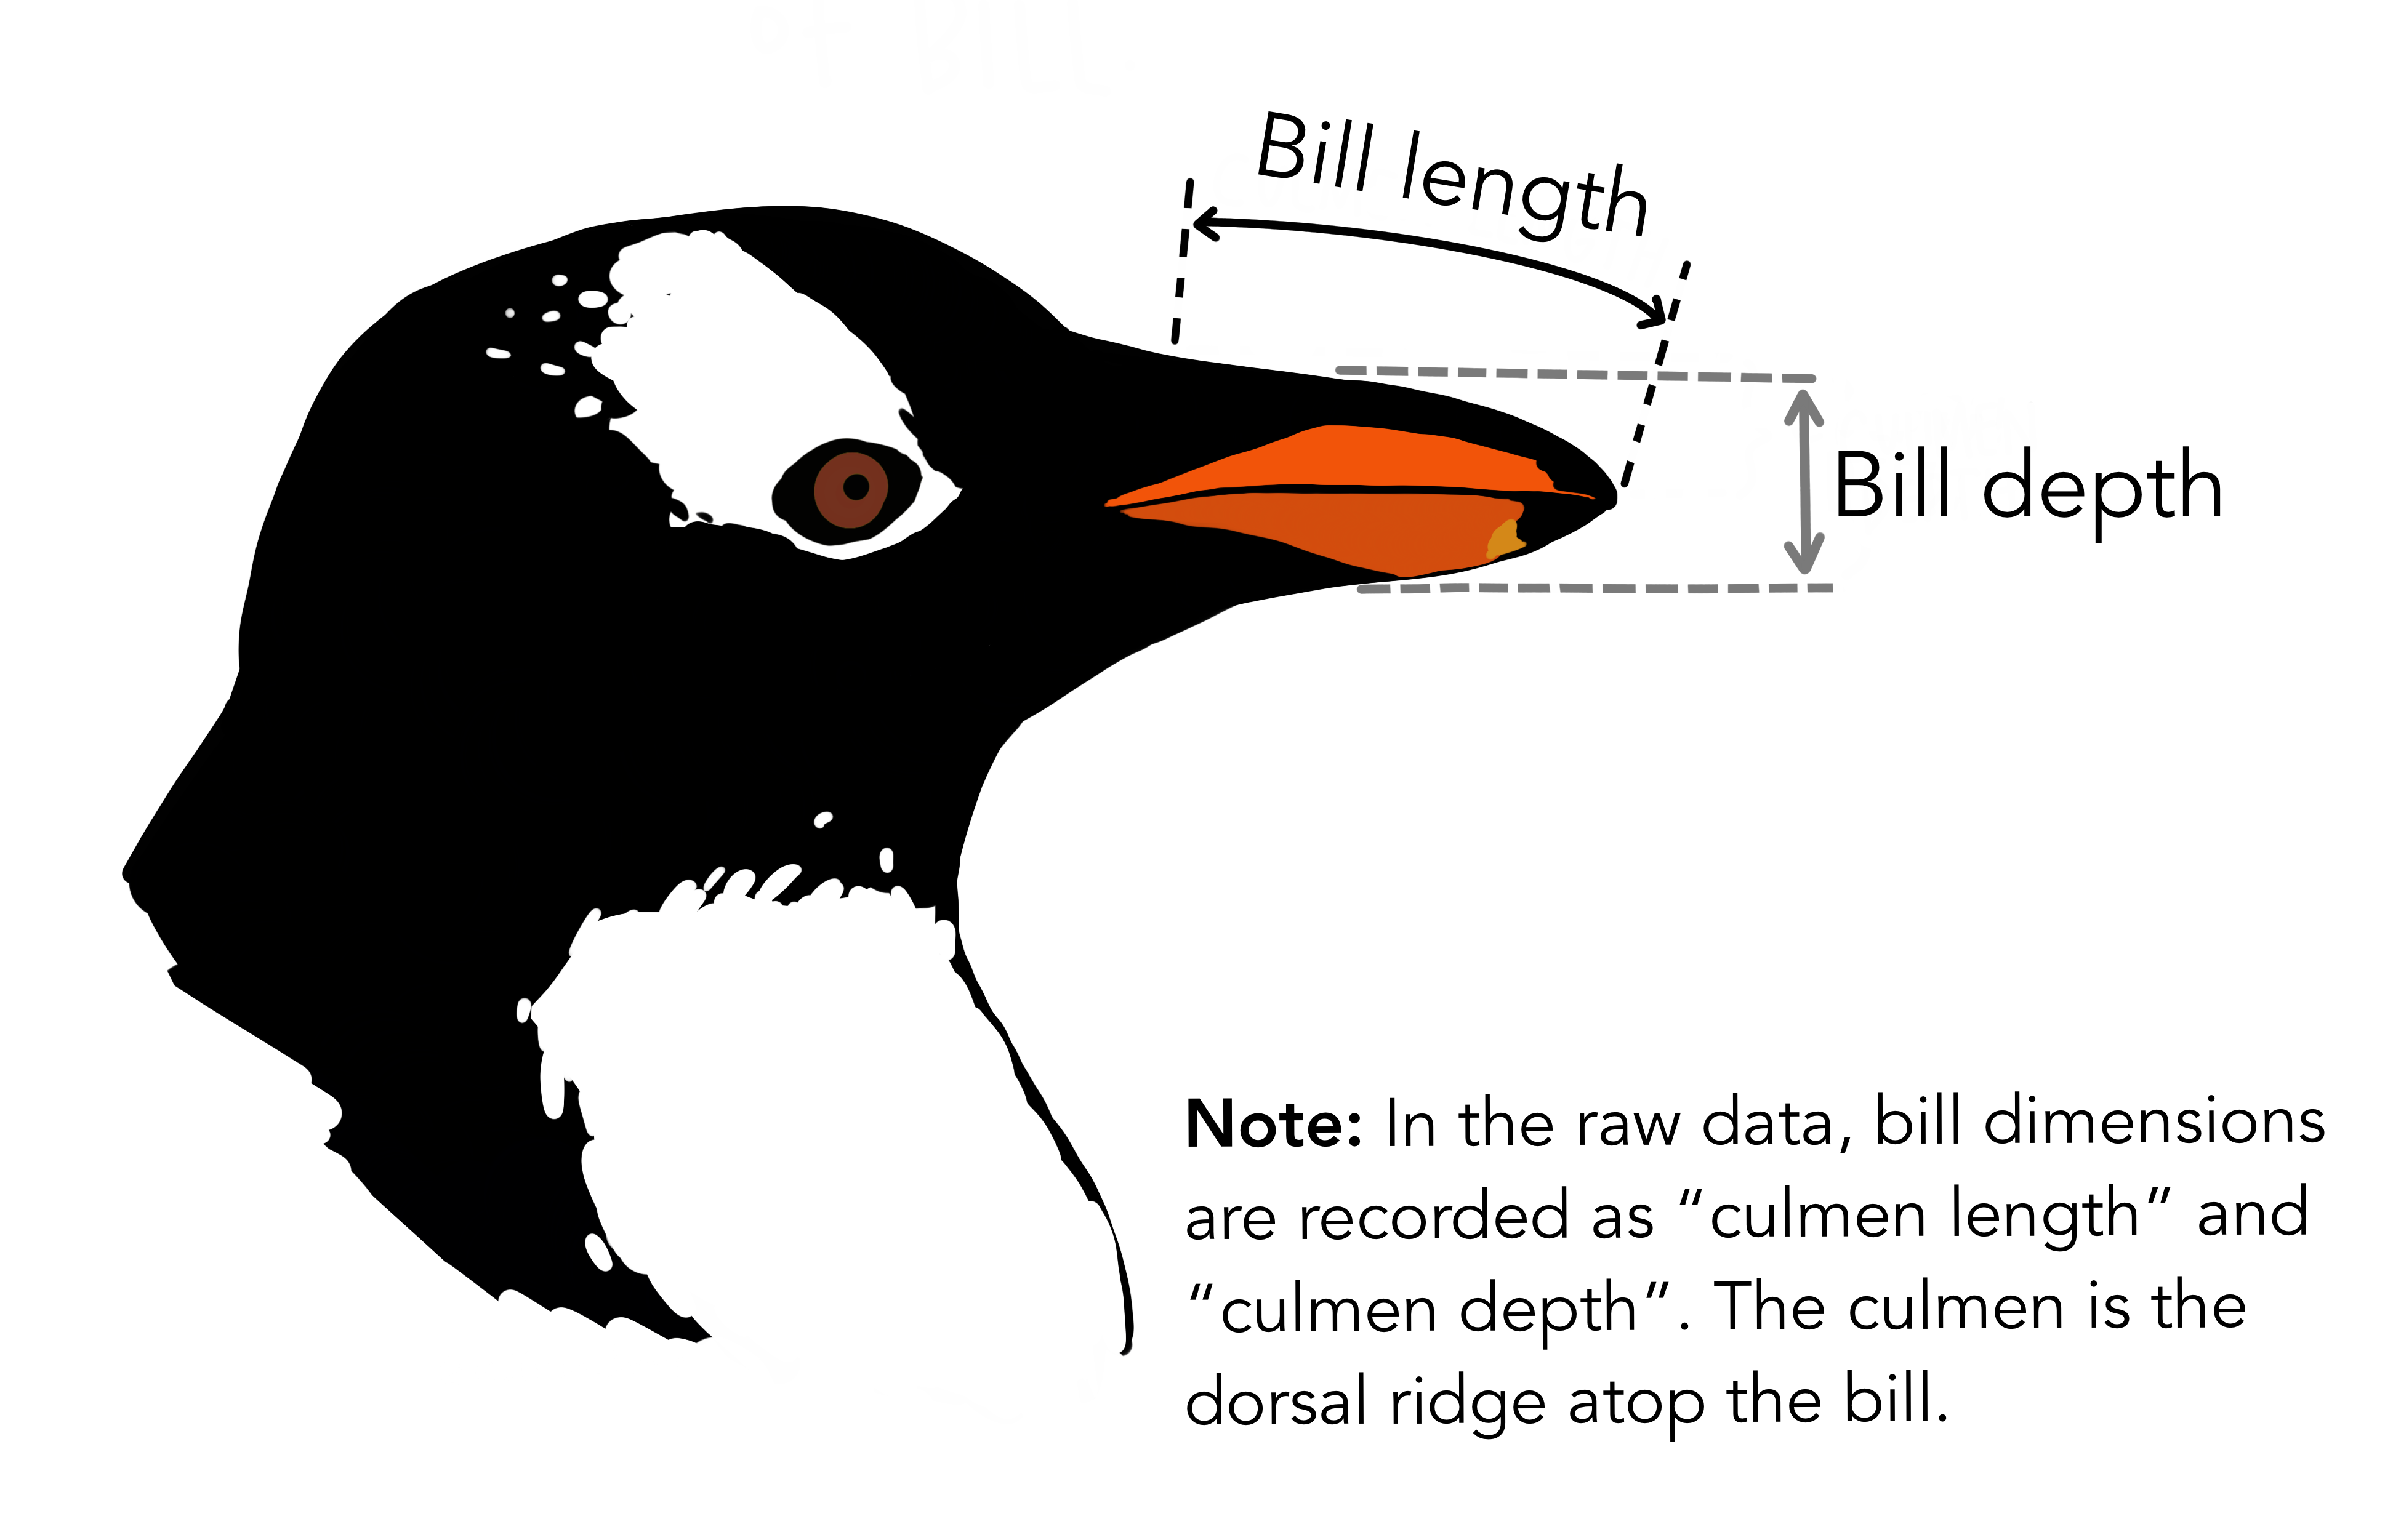

GOAL: Predict a penguins species using the attributes available in the dataset

## 2. Identify inputs and outpus

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.shape

(344, 7)

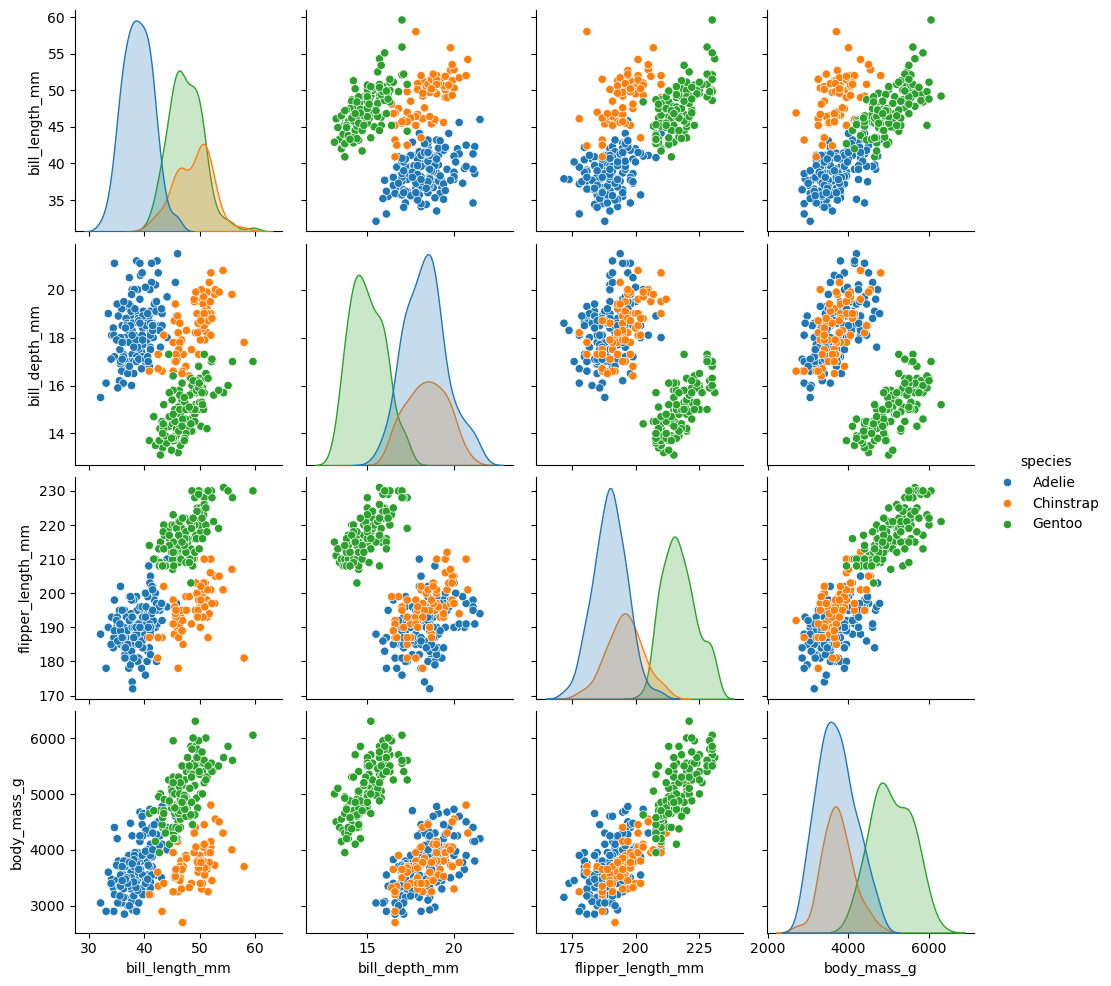

In [5]:
sns.pairplot(penguins, hue="species")

input: bill length, bill depth, flippe rlength and body mass
output: species

## 3. Prepare data

In [6]:
penguins_filtered = penguins.drop(columns=['island', 'sex'])

In [7]:
# clean missing values (Drop ros that have any NaN value)
penguins_filtered = penguins_filtered.dropna()

In [8]:
# Extract the columns corresponding to features
features = penguins_filtered.drop(columns=['species'])

In [9]:
import pandas as pd

In [10]:
penguins_filtered['species'].head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [11]:
# One-hot encoding
target = pd.get_dummies(penguins_filtered['species'])
target

# How many output neurons do we need in our network?
# 3 output neurons
# 0.8 0.1 0.1

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
338,False,False,True
340,False,False,True
341,False,False,True
342,False,False,True


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=0)

In [14]:
X_train.shape

(273, 4)

## 4. Build an architecture from scratch or choose a pretrained model

In [15]:
from tensorflow import keras

In [16]:
from numpy.random import seed
seed(1)
keras.utils.set_random_seed(2)

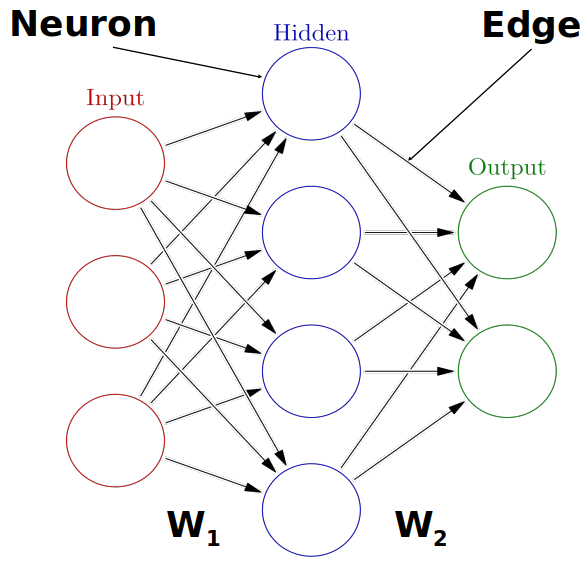

In [17]:
# input layer
inputs = keras.Input(shape=X_train.shape[1])

In [18]:
X_train.shape

(273, 4)

In [19]:
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

In [20]:
# softmax [4.6667 -2.333 0.23434] -> [0.7, 0.05, 0.25] (it should sum to 1)
output_layer = keras.layers.Dense(3, activation="softmax", name="output")(hidden_layer)

In [21]:
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Create the neural network
With the code snippets above, we defined a Keras model with 1 hidden layer with
10 neurons and an output layer with 3 neurons.

* How many parameters does the resulting model have?
* What happens to the number of parameters if we increase or decrease the number of neurons in the hidden layer?

### (optional) Keras Sequential vs Functional API
So far we have used the Functional API of Keras. You can also implement neural networks using the Sequential model. As you can read in the documentation, the Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

* (optional) Use the Sequential model to implement the same network

## 5. Choose a loss function and optimizer
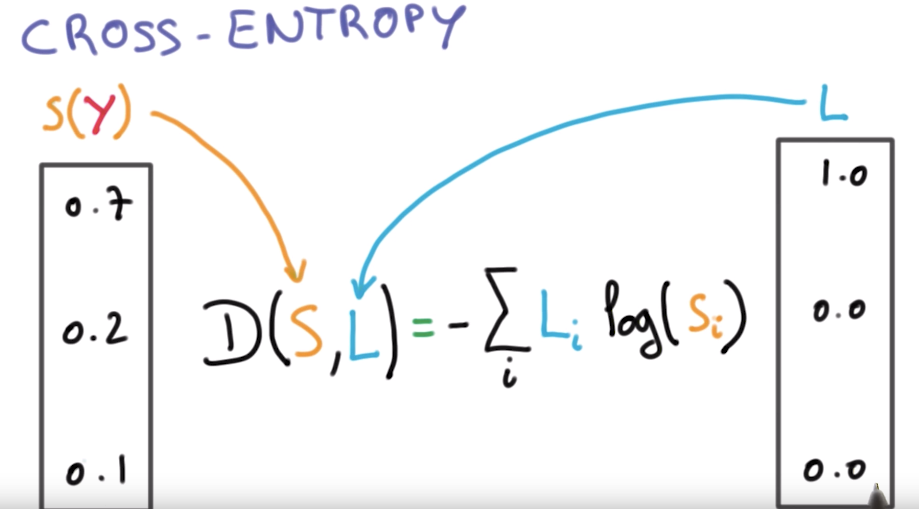

In [22]:
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())

## 6. Train model

In [23]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 854us/step - loss: 645.6365
Epoch 2/100
9/9 [==============================] - 0s 570us/step - loss: 532.2158
Epoch 3/100
9/9 [==============================] - 0s 558us/step - loss: 418.6879
Epoch 4/100
9/9 [==============================] - 0s 582us/step - loss: 300.9576
Epoch 5/100
9/9 [==============================] - 0s 576us/step - loss: 196.6358
Epoch 6/100
9/9 [==============================] - 0s 590us/step - loss: 115.7458
Epoch 7/100
9/9 [==============================] - 0s 571us/step - loss: 41.0538
Epoch 8/100
9/9 [==============================] - 0s 607us/step - loss: 32.4573
Epoch 9/100
9/9 [==============================] - 0s 671us/step - loss: 19.3050
Epoch 10/100
9/9 [==============================] - 0s 717us/step - loss: 17.6231
Epoch 11/100
9/9 [==============================] - 0s 615us/step - loss: 16.0193
Epoch 12/100
9/9 [==============================] - 0s 497us/step - loss: 15.4364
Epoch 13/100
9/9 [=

<Axes: >

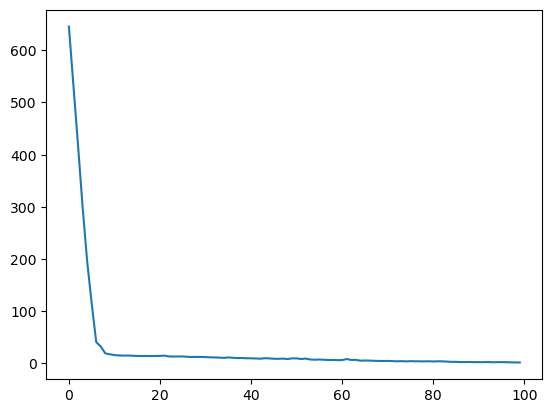

In [24]:
sns.lineplot(x=history.epoch, y=history.history["loss"])

## The Training Curve
Looking at the training curve we have just made.

1. How does the training progress?
   * Does the training loss increase or decrease?
   * Does it change quickly or slowly?
   * Does the graph look very jittery?
2. Do you think the resulting trained network will work well on the test set?

When the training process does not go well:

3. (optional) Something went wrong here during training. What could be the problem, and how do you see that in the training curve?
Also compare the range on the y-axis with the previous training curve.
![](https://codimd.carpentries.org/uploads/upload_9a7323086d120cf1de9be691a79ca64e.png)

## 7. Perform a prediction/classification

In [25]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 696us/step


In [26]:
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction

,Adelie,Chinstrap,Gentoo
0,0.995544,0.000346,0.004110
1,0.753642,0.000324,0.246034
2,0.996253,0.002290,0.001457
3,0.017115,0.037633,0.945252
4,0.999398,0.000134,0.000468
...,...,...,...
64,0.083967,0.867567,0.048466
65,0.158572,0.744412,0.097016
66,0.002446,0.996356,0.001198
67,0.185966,0.217164,0.596870


In [27]:
predicted_species = prediction.idxmax(axis="columns")
predicted_species

0        Adelie
1        Adelie
2        Adelie
3        Gentoo
4        Adelie
        ...    
64    Chinstrap
65    Chinstrap
66    Chinstrap
67       Gentoo
68       Adelie
Length: 69, dtype: object

## 8. Measuring performance

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
true_species = y_test.idxmax(axis="columns")

In [30]:
matrix = confusion_matrix(true_species, predicted_species)

In [31]:
matrix

array([[20, 16,  0],
       [ 1,  4,  7],
       [11,  0, 10]])

In [32]:
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, 
                            columns=y_test.columns.values)

In [33]:
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

In [34]:
confusion_df

Predicted Label,Adelie,Chinstrap,Gentoo
True Label,,,
Adelie,20,16,0
Chinstrap,1,4,7
Gentoo,11,0,10


<Axes: xlabel='Predicted Label', ylabel='True Label'>

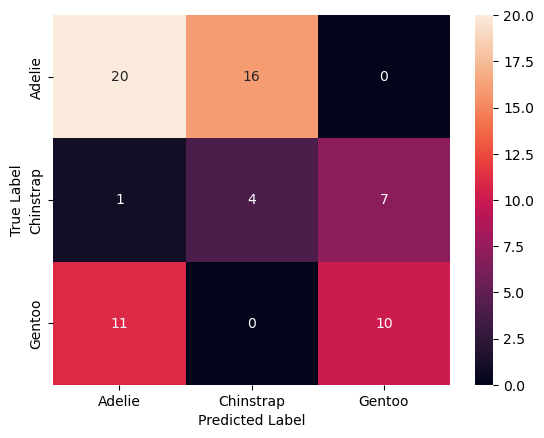

In [35]:
sns.heatmap(confusion_df, annot=True)

## Confusion Matrix (IN BREAKOUT ROOMS)
You measured the performance of the neural network you trained by
visualizing a confusion matrix.

- Did the neural network perform well on the test set?
- Did you expect this from the training loss you saw?
- What could we do to improve the performance?

In [38]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

## 9. Refine the model

## 10. Share model

In [39]:
model.save("my_amazing_first_cute_model")

INFO:tensorflow:Assets written to: my_amazing_first_cute_model/assets


INFO:tensorflow:Assets written to: my_amazing_first_cute_model/assets


In [41]:
pretrained_model = keras.models.load_model("my_amazing_first_cute_model")

In [42]:
pretrained_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
